In [ ]:
import math
import pandas as pd
import time
import numpy as np

In [ ]:
# input : 經緯度座標 (CLatLng 物件)
# output : 二度分帶座標 (CPoint 物件) 此座標以公尺為單位
def geo2tm2 (CLatLng):

    _lat = CLatLng[0] / 180 * math.pi
    _lng = CLatLng[1]

    a = 6378137
    f = 1 / 298.257222101

    K = 0.9999
    clng = 121.0
    FalseEasting = 250000
    e2 = 2 * f - f * f

    dl = (_lng - clng) / 180 * math.pi

    lS = math.sin(_lat)
    lC = math.cos(_lat)
    lT = math.tan(_lat)

    R = a * (1 - e2) / (math.pow(1 - e2 * lS * lS, 1.5))
    N = a / math.sqrt(1 - e2 * lS * lS)

    x = N * lC * dl + 1 / 6 * N * math.pow(lC, 3) * (N / R - lT * lT) * math.pow(dl, 3) + 1 / 120 * N * math.pow(lC, 5) * (5 - 18 * lT * lT + math.pow(lT, 4)) * math.pow(dl, 5)

    yd = a * ((1 - e2 / 4 - 3 * e2 * e2 / 64 - 5 * e2 * e2 * e2 / 256) * _lat - (3 * e2 / 8 + 3 * e2 * e2 / 32 + 45 * e2 * e2 * e2 / 1024) * math.sin(2 * _lat) + (15 * e2 * e2 / 256 + 45 * e2 * e2 * e2 / 1024) * math.sin(4 * _lat) - (35 * e2 * e2 * e2 / 3072) * math.sin(6 * _lat))

    y = yd + 1 / 2 * N * lS * lC * math.pow(dl, 2) + 1 / 24 * N* lS* math.pow(lC, 3) * (5 - lT * lT) * math.pow(dl, 4)

    x = x * K + FalseEasting
    y = y * K

    return (x,y)

# input : 經緯度 (CLatLng 物件)
# output : 該經緯度所在的網格編號 x, y
def getIndexByLatLng(a,b) :
    CLatLng = (a,b)
    sw_o_lat = -32871.40540000000
    sw_o_lng = 2422126.00169999991
    distanceofMeter = 50
    x,y = geo2tm2(CLatLng)
    ilng = y
    ilat = x
#     print(f"a = {a} , b = {b} , ilng = {ilng} ,sw_o_lng = {sw_o_lng} ,distanceofMeter = {distanceofMeter}")
    grid_x_nums = math.floor((ilng - sw_o_lng)/ distanceofMeter)  # x幾格
    grid_y_nums = math.floor((ilat - sw_o_lat)/ distanceofMeter)  # y幾格
    return pd.Series([grid_x_nums, grid_y_nums])


def getIndexByLatLng(a,b) :
    CLatLng = (a,b)
    sw_o_lat = -32871.40540000000
    sw_o_lng = 2422126.00169999991
    distanceofMeter = 50
    x,y = geo2tm2(CLatLng)
    ilng = y
    ilat = x
#     print(f"a = {a} , b = {b} , ilng = {ilng} ,sw_o_lng = {sw_o_lng} ,distanceofMeter = {distanceofMeter}")
    grid_x_nums = math.floor((ilng - sw_o_lng)/ distanceofMeter)  # x幾格
    grid_y_nums = math.floor((ilat - sw_o_lat)/ distanceofMeter)  # y幾格
    return np.array([grid_x_nums, grid_y_nums])



import math

def tm2geo(tm2):
    x = tm2['x']
    y = tm2['y']
    a = 6378137
    f = 1 / 298.257222101
    K = 0.9999
    clng = 121.0
    FalseEasting = 250000
    e2 = 2 * f - f * f

    xb = (x - FalseEasting) / K
    yb = y / K

    F1 = -89.999
    F2 = 89.999

    c1 = 0
    C = 0
    Z = 0
    DZY = 0

    for i in range(1000):
        c1 = 0.5 * (F1 + F2)
        C = c1 / 180 * math.pi
        Z = a * (( 1 - e2 / 4 - 3 * e2 * e2 / 64 - 5 * e2 * e2 * e2 / 256) * C - (3 * e2 / 8 + 3 * e2 * e2 / 32 + 45 * e2 * e2 * e2 / 1024) * math.sin(2 * C) + (15 * e2 * e2 / 256 + 45 * e2 * e2 * e2 / 1024) * math.sin(4 *C) - (35 * e2 * e2 * e2 / 3072) * math.sin(6 * C))
        DZY = Z - yb
        if DZY > 0:
            if DZY < 0.001:
                break
            else:
                F2 = c1
        else:
            if DZY > -0.001:
                break
            else:
                F1 = c1

    slat = C
    lS = math.sin(slat)
    lT = math.tan(slat)
    lSec = 1 / math.cos(slat)

    R = a * (1 - e2) / (math.pow(1 - e2 * lS * lS, 1.5))
    N = a / math.sqrt(1 - e2 * lS * lS)

    lat = slat - (xb * xb * lT) / (2 * R * N) + math.pow(xb, 4) / (24 * R * N * N * N) * (5 + 3 * lT * lT) * lT
    lng = xb * lSec / N - xb * xb * xb / (6 * N * N * N) * lSec * (N / R + 2 * lT * lT) + math.pow(xb, 5) / (120 * math.pow(N, 5)) * lSec * (5 + 28 * lT * lT + 24 * math.pow(lT, 4))

    lat = lat / math.pi * 180
    lng = lng / math.pi * 180
    lng += clng

    return [lat, lng]



def getGridCenterByClusteredIndex2(y,x):
    gridbound_sw_lng = 2422126.0017 +  round(y)* 50
    gridbound_ne_lng = 2422126.0017 + (round(y)+1)  * 50

    gridbound_sw_lat = -32871.4054 + (x  * 50)
    gridbound_ne_lat = -32871.4054 + ((x )+1)* 50

    pointobj = {}
    pointobj['x'] = gridbound_sw_lat
    pointobj['y'] = gridbound_sw_lng
    leftLower = tm2geo(pointobj)
    pointobj = {}
    pointobj['x'] = gridbound_ne_lat
    pointobj['y'] = gridbound_ne_lng
    rightUpper = tm2geo(pointobj)
    return [leftLower,rightUpper]

## 批次經緯度轉GXGY

In [ ]:
df = pd.read_csv("宏華32.csv")
df[['GX', 'GY']] = df.apply(lambda row: pd.Series(getIndexByLatLng(row['lat'], row['lng'])), axis=1)


In [ ]:
df

,地址,lat,lng,GX,GY
0,嘉義市西區垂楊路508號,23.473810,120.447129,3494,4527
1,嘉義市西區民生北路350號,23.483051,120.445984,3515,4525
2,嘉義市西區中山路360號,23.479831,120.446929,3508,4527
3,中壢區領航北路二段216號,25.008881,121.204402,6893,6070
4,高雄市鼓山區臨海二路43號,22.622890,120.272010,1611,4160
5,高雄市鼓山區青海路116號,22.651638,120.288231,1675,4194
6,北市中正區羅斯福路四段76號,25.014231,121.534535,6906,6736
7,台北市中正區羅斯福路三段308號-1,25.016165,121.532526,6910,6732
8,台北市中正區羅斯福路三段329號,25.017023,121.532321,6912,6731
9,花蓮縣花蓮市富國路21號,23.991610,121.597144,4641,6872


In [ ]:
df.to_csv("honghua32.csv",index=False)

# 經緯度轉GXGY

In [ ]:
lat_lng = input("請輸入經緯度: (ex.25.033311110541078, 121.5436531611372)\n")
lat = float(lat_lng.split(",")[0])
lng = float(lat_lng.split(",")[1])
res = getIndexByLatLng(lat,lng)
GX = res[0]
GY = res[1]
print("=============================")
print(f"經度: {lng} 緯度: {lat}")

print(f"GX,GY: {GX},{GY}")

請輸入經緯度: (ex.25.033311110541078, 121.5436531611372)
25.068628041125883, 121.59132765186263
經度: 121.59132765186263 緯度: 25.068628041125883
GX,GY: 7027,6850


# GXGY反查詳細網格的地圖位置 (網格地圖視覺化)

In [ ]:

gx = 6905
gy = 6599
gxgy = input("GX,GY: (ex.7138,6733) ")
gx = gxgy.split(",")[0]
gy = gxgy.split(",")[1]
gx = int(gx)
gy = int(gy)
center_coords = getGridCenterByClusteredIndex2(gx,gy)
print(center_coords)

import folium # 匯入 folium 套件
fmap = folium.Map(location=center_coords[0], zoom_start=18)

expand_num = 5
expand_num = input("半徑外擴網格數: (ex.5) ")
expand_num = int(expand_num)
for i in range(-expand_num,expand_num+1):
  for j in range(-expand_num,expand_num+1):

    # if ((i == -expand_num) or (i == expand_num)) or ((j == -expand_num) or (j == expand_num)):
    center_coords = getGridCenterByClusteredIndex2(gx+i,gy+j)



    folium.Rectangle(
        bounds=[center_coords[0], center_coords[1]],
        color="#ff7800",
        fill=True,
        fill_color="#ffff00",
        fill_opacity=0.2,
        popup=folium.Popup(f'{gx+i},{gy+j}', max_width=200)
    ).add_to(fmap)
    if i == expand_num and j == expand_num:
      center_coords = getGridCenterByClusteredIndex2(gx,gy)

      folium.Rectangle(
          bounds=[center_coords[0], center_coords[1]],
          color="red",
          fill=True,
          fill_color="#ffff00",
          fill_opacity=0.2,
          popup=folium.Popup(f'{gx},{gy}', max_width=200)
      ).add_to(fmap)

fmap

GX,GY: (ex.7138,6733) 1053,4783
[[22.37171793768318, 120.57544304012713], [22.372170778614866, 120.57592718740737]]
半徑外擴網格數: (ex.5) 2


# 所有GXGY與其經緯度

In [ ]:
# center_coords = getGridCenterByClusteredIndex2(gx,gy)
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
# 生成 0 到 7999 的一維數組
x = np.arange(7000, 8000)
y = np.arange(0,8000)

# 使用 meshgrid 函數生成二維陣列
gx, gy = np.meshgrid(x, y)

# 將二維陣列 gx 和 gy 展平成一維陣列
gx_flat = gx.ravel()
gy_flat = gy.ravel()

# 將一維陣列組合成DataFrame
data = {'gx': gx_flat, 'gy': gy_flat}
df = pd.DataFrame(data)

# 輸出 DataFrame 的形狀和頭部數據以確認
print(df.shape)






(8000000, 2)


In [ ]:
from numba import jit

@jit(nopython=True)
def calculate_bounds(gx, gy):
    gridbound_sw_lng = 2422126.0017 +  np.floor(gy) * 50
    gridbound_ne_lng = 2422126.0017 + (np.floor(gy) + 1) * 50
    gridbound_sw_lat = -32871.4054 + (gx * 50)
    gridbound_ne_lat = -32871.4054 + ((gx) + 1) * 50

    return (gridbound_sw_lng+gridbound_ne_lng)/2, (gridbound_sw_lat+gridbound_ne_lat)/2


@jit(nopython=True)
def tm2geo(x,y):
    # x = tm2['x']
    # y = tm2['y']
    a = 6378137
    f = 1 / 298.257222101
    K = 0.9999
    clng = 121.0
    FalseEasting = 250000
    e2 = 2 * f - f * f

    xb = (x - FalseEasting) / K
    yb = y / K

    F1 = -89.999
    F2 = 89.999

    c1 = 0
    C = 0
    Z = 0
    DZY = 0

    for i in range(1000):
        c1 = 0.5 * (F1 + F2)
        C = c1 / 180 * math.pi
        Z = a * (( 1 - e2 / 4 - 3 * e2 * e2 / 64 - 5 * e2 * e2 * e2 / 256) * C - (3 * e2 / 8 + 3 * e2 * e2 / 32 + 45 * e2 * e2 * e2 / 1024) * math.sin(2 * C) + (15 * e2 * e2 / 256 + 45 * e2 * e2 * e2 / 1024) * math.sin(4 *C) - (35 * e2 * e2 * e2 / 3072) * math.sin(6 * C))
        DZY = Z - yb
        if DZY > 0:
            if DZY < 0.001:
                break
            else:
                F2 = c1
        else:
            if DZY > -0.001:
                break
            else:
                F1 = c1

    slat = C
    lS = math.sin(slat)
    lT = math.tan(slat)
    lSec = 1 / math.cos(slat)

    R = a * (1 - e2) / (math.pow(1 - e2 * lS * lS, 1.5))
    N = a / math.sqrt(1 - e2 * lS * lS)

    lat = slat - (xb * xb * lT) / (2 * R * N) + math.pow(xb, 4) / (24 * R * N * N * N) * (5 + 3 * lT * lT) * lT
    lng = xb * lSec / N - xb * xb * xb / (6 * N * N * N) * lSec * (N / R + 2 * lT * lT) + math.pow(xb, 5) / (120 * math.pow(N, 5)) * lSec * (5 + 28 * lT * lT + 24 * math.pow(lT, 4))

    lat = lat / math.pi * 180
    lng = lng / math.pi * 180
    lng += clng

    return [lat, lng]

In [ ]:
# 使用向量化操作計算界限
center_lng, center_lat = calculate_bounds(df['gx'].values, df['gy'].values)

df['center_lat'] = center_lat

df['center_lng'] = center_lng

from tqdm import tqdm

# 假设 df 是您的DataFrame，并且它有 'x' 和 'y' 等列

# 使用Numba加速的tm2geo函数计算经纬度
latitudes, longitudes = zip(*[tm2geo(x, y) for x, y in tqdm(zip(df['center_lat'].values, df['center_lng'].values), total=len(df), desc='Calculating Lat/Long')])

# 将结果保存回DataFrame
df['latitude'] = latitudes
df['longitude'] = longitudes

Calculating Lat/Long: 100%|██████████| 8000000/8000000 [00:30<00:00, 260403.97it/s]


In [ ]:
df

,gx,gy,center_lat,center_lng,latitude,longitude
0,6000,0,267153.5946,2.422151e+06,21.896897,121.166014
1,6001,0,267203.5946,2.422151e+06,21.896897,121.166498
2,6002,0,267253.5946,2.422151e+06,21.896896,121.166981
3,6003,0,267303.5946,2.422151e+06,21.896896,121.167465
4,6004,0,267353.5946,2.422151e+06,21.896895,121.167949
...,...,...,...,...,...,...
7999995,6995,7999,316903.5946,2.822101e+06,25.506981,121.665553
7999996,6996,7999,316953.5946,2.822101e+06,25.506979,121.666051
7999997,6997,7999,317003.5946,2.822101e+06,25.506977,121.666548
7999998,6998,7999,317053.5946,2.822101e+06,25.506975,121.667045


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

d = gpd.read_file("Town_Majia_Sanhe.shp",encoding = 'utf-8')

In [ ]:
d

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,T28,10013280,屏東縣,瑪家鄉,Majia Township,T,10013,"MULTIPOLYGON (((120.66036 22.70957, 120.66034 ..."


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

d = gpd.read_file("TOWN_MOI_1120317.shp",encoding = 'utf-8')

In [ ]:
d

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40981 23.21370, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54845 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81624, 120.30198 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49154 22.67746, 121.49184 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61179 21.94290, 121.61133 ..."
...,...,...,...,...,...,...,...,...
363,U12,10015120,花蓮縣,萬榮鄉,Wanrong Township,U,10015,"POLYGON ((121.27481 23.92640, 121.27521 23.926..."
364,H09,68000090,桃園市,龍潭區,Longtan District,H,68000,"POLYGON ((121.19257 24.89410, 121.19262 24.894..."
365,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((121.19052 24.97122, 121.19059 24.971..."
366,A13,63000090,臺北市,南港區,Nangang District,A,63000,"POLYGON ((121.61426 25.06451, 121.61426 25.064..."


In [ ]:
d[d['COUNTYID'] == 'F']

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
209,F33,65000040,新北市,永和區,Yonghe District,F,65000,"POLYGON ((121.51240 25.02174, 121.51256 25.021..."
210,F07,65000060,新北市,新店區,Xindian District,F,65000,"POLYGON ((121.60923 24.96402, 121.60930 24.963..."
211,F19,65000130,新北市,土城區,Tucheng District,F,65000,"POLYGON ((121.46715 24.99298, 121.46717 24.993..."
212,F04,65000140,新北市,蘆洲區,Luzhou District,F,65000,"POLYGON ((121.49115 25.09476, 121.49026 25.093..."
213,F03,65000150,新北市,五股區,Wugu District,F,65000,"POLYGON ((121.45903 25.11272, 121.45902 25.112..."
214,F10,65000200,新北市,坪林區,Pinglin District,F,65000,"POLYGON ((121.77712 24.98485, 121.77716 24.984..."
215,F22,65000240,新北市,平溪區,Pingxi District,F,65000,"POLYGON ((121.81688 25.04211, 121.81677 25.042..."
216,F11,65000290,新北市,烏來區,Wulai District,F,65000,"POLYGON ((121.57578 24.87508, 121.57581 24.875..."
256,F27,65000100,新北市,淡水區,Tamsui District,F,65000,"POLYGON ((121.45068 25.24424, 121.45080 25.244..."
257,F21,65000120,新北市,瑞芳區,Ruifang District,F,65000,"POLYGON ((121.82350 25.13601, 121.82350 25.136..."


<Axes: >

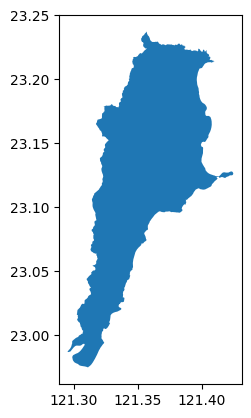

In [ ]:
d.iloc[[0]].plot()a

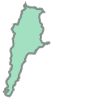

In [ ]:
d.iloc[[0]]['geometry'][0]

In [ ]:


spatial_index = d.sindex

In [ ]:
d = d[[ 'COUNTYNAME', 'TOWNNAME', 'geometry']]

KeyError: "['COUNTYNAME', 'TOWNNAME'] not in index"

In [ ]:
d.columns

Index(['COUNTYNAME', 'TOWNNAME', 'geometry'], dtype='object')

In [ ]:


def find_country_name(row):
    point = Point(row['longitude'], row['latitude'])
    possible_matches_index = list(spatial_index.intersection(point.bounds))
    possible_matches = d.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(point)]
    if not precise_matches.empty:
        return precise_matches.iloc[0]['COUNTYNAME']
    else:
        return None

def find_town_name(row):
    point = Point(row['longitude'], row['latitude'])
    possible_matches_index = list(spatial_index.intersection(point.bounds))
    possible_matches = d.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(point)]
    if not precise_matches.empty:
        return precise_matches.iloc[0]['TOWNNAME']
    else:
        return None

In [ ]:
# 将点的DataFrame转化为GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

# 执行空间连接
result = gpd.sjoin(gdf_points, d, how='left', op='within')

# 将结果保存回原始DataFrame
df['COUNTY_NAME'] = result['COUNTYNAME']
df['TOWNNAME'] = result['TOWNNAME']


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-16-d723a05804bd>:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["GCS_TWD97[2020]",DATUM["Taiwan_Datum_1997" ...

  result = gpd.sjoin(gdf_points, d, how='left', op='within')


In [ ]:
df = df.dropna()

In [ ]:
df[['gx','gy','COUNTY_NAME','TOWNNAME']].to_csv("7000_8000.csv",index=False,encoding = 'big5')

In [ ]:
df

,gx,gy,center_lat,center_lng,latitude,longitude,COUNTY_NAME,TOWNNAME
4949000,7000,4949,317153.5946,2.669601e+06,24.130202,121.660697,花蓮縣,秀林鄉
4950000,7000,4950,317153.5946,2.669651e+06,24.130653,121.660700,花蓮縣,秀林鄉
4951000,7000,4951,317153.5946,2.669701e+06,24.131105,121.660702,花蓮縣,秀林鄉
4951001,7001,4951,317203.5946,2.669701e+06,24.131102,121.661194,花蓮縣,秀林鄉
4952000,7000,4952,317153.5946,2.669751e+06,24.131556,121.660704,花蓮縣,秀林鄉
...,...,...,...,...,...,...,...,...
7961883,7883,7961,361303.5946,2.820201e+06,25.487162,122.107032,基隆市,中正區
7962879,7879,7962,361103.5946,2.820251e+06,25.487628,122.105047,基隆市,中正區
7962880,7880,7962,361153.5946,2.820251e+06,25.487624,122.105545,基隆市,中正區
7962881,7881,7962,361203.5946,2.820251e+06,25.487621,122.106042,基隆市,中正區
